$\textbf{DS122 - STATISTICAL COMPUTING} \\ \texttt{2Q SY2324}$

MA. ADDINE ANNE T. CARREON  |  SYDNEY ANNE V. LUCAS

SECTION: A37

DATE SUBMITTED: 01/18/2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Advertising Sales Dataset

*The dataset source is from kaggle of the author M Yasser.*

Link: https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset

#### Description: 

The utilized dataset is an advertising dataset that measures the sales income earned relative to the advertisement expenses within radio, television, and newspapers. In this dataset with the execution of a **one-way ANOVA test**, the dependent variable is the sales, and the independent variables are the mentioned channels. 

In [2]:
sales = pd.read_csv('Advertising-Budget-and-Sales.csv')

In [3]:
sales

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64
       TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
count        200.000000           200.000000               200.000000   
mean         147.042500            23.264000                30.554000   
std           85.854236            14.846809                21.778621   
min            0.700000             0.000000                 0.300000   
25%           74.375000             9.975000                12.750000   
50%          149.750000            22.900000                25.750000   
75%          218.825000            36.525000                45.100000   
max          296.400000            49.600000               114.000000   

        Sales ($)  
count  200.000000  
mean    14.022500  
std      5.217457  
min      1.600000  
25%     10.375000  
50%     12.900000  
75%     17.400000  
max     27.000000  


C:\Users\Addine Carreon\Downloads\APPS\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


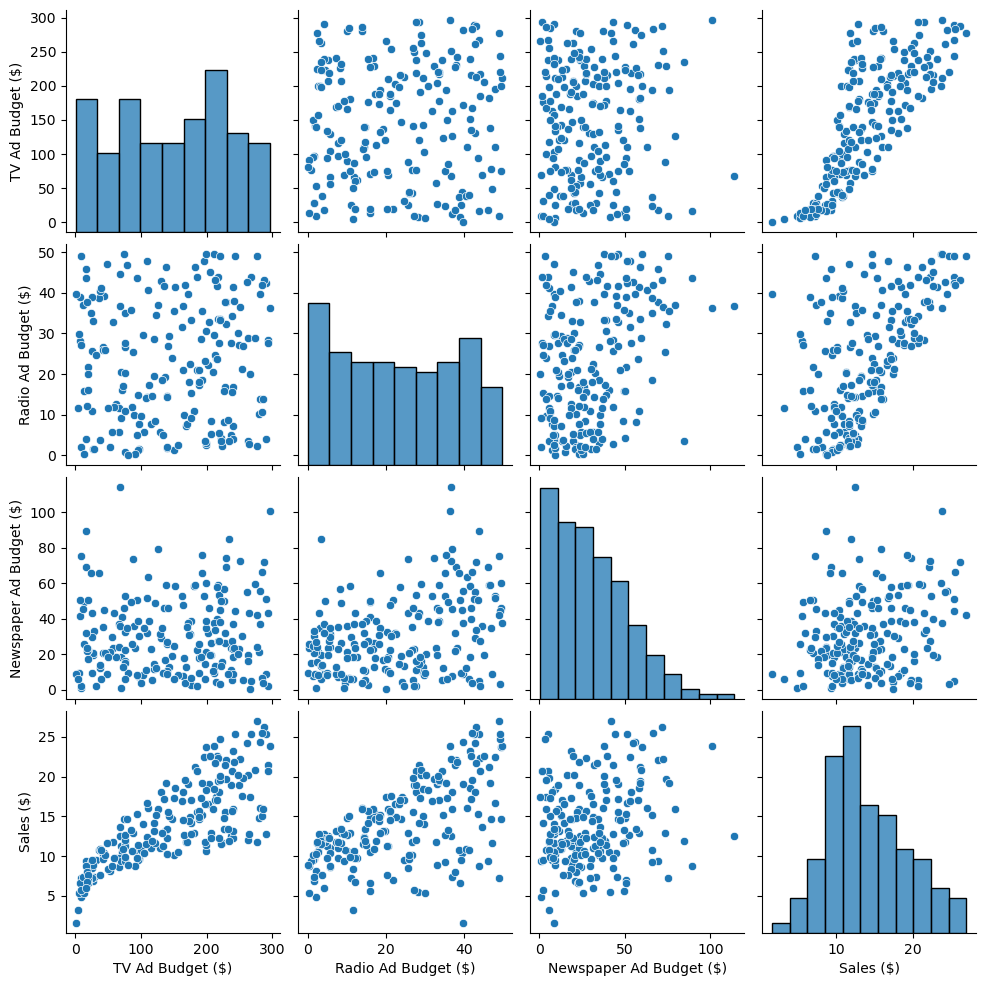

In [5]:
# Drop the 'Unnamed: 0' column as it seems to be an index
sales.drop('Unnamed: 0', axis=1, inplace=True)

# Check for missing values
print(sales.isnull().sum())

# Summary statistics
print(sales.describe())

# Show the distribution of each variable
sns.pairplot(sales)
plt.show()

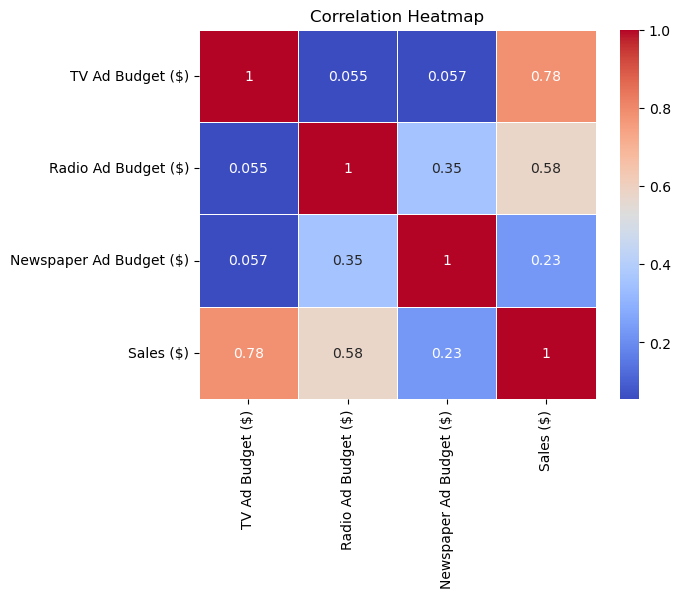

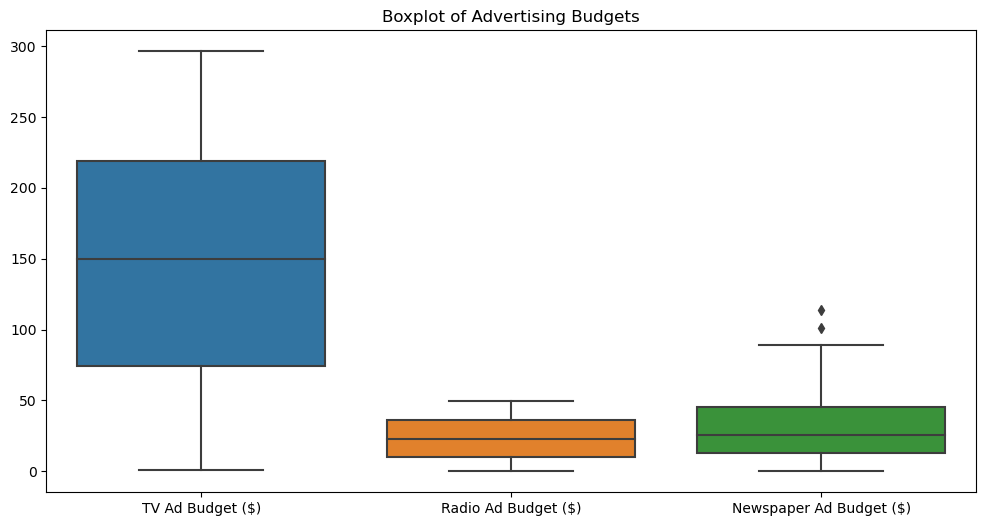

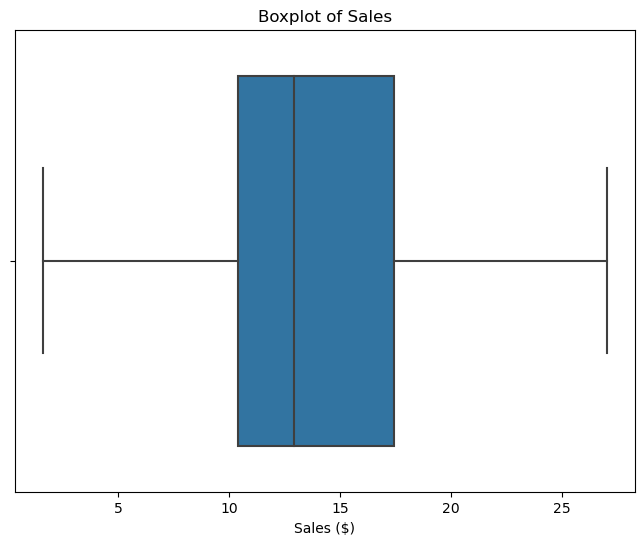

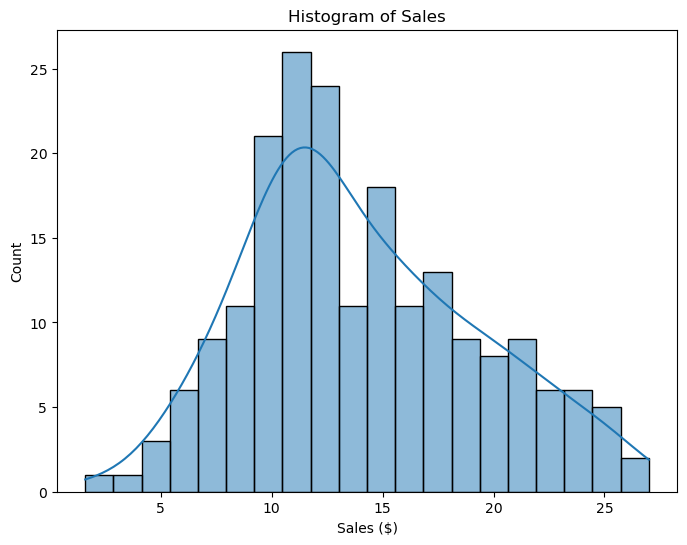

In [6]:
# Correlation heatmap
correlation_matrix = sales.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for Sales across different advertising channels
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']])
plt.title("Boxplot of Advertising Budgets")
plt.show()

# Boxplot for Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=sales['Sales ($)'])
plt.title("Boxplot of Sales")
plt.show()

# Histogram of Sales
plt.figure(figsize=(8, 6))
sns.histplot(sales['Sales ($)'], bins=20, kde=True)
plt.title("Histogram of Sales")
plt.show()

### The null and alternative hypothesis are:

**Null hypothesis**: There is no significant difference in sales revenue among different advertising channels (TV, Radio, Newspaper).

**Alternative hypothesis**: There is a significant difference in sales revenue among different advertising channels.

In [7]:
# Perform ANOVA
from scipy.stats import f_oneway

tv_sales = sales['Sales ($)'][sales['TV Ad Budget ($)'] > 0]
radio_sales = sales['Sales ($)'][sales['Radio Ad Budget ($)'] > 0]
newspaper_sales = sales['Sales ($)'][sales['Newspaper Ad Budget ($)'] > 0]

f_stat, p_value = f_oneway(tv_sales, radio_sales, newspaper_sales)

print("\033[1mF-statistic:\033[0m", round(f_stat, 4))
print("\033[1mP-value:\033[0m", p_value)

F-statistic: 0.0017
P-value: 0.9983203137463637


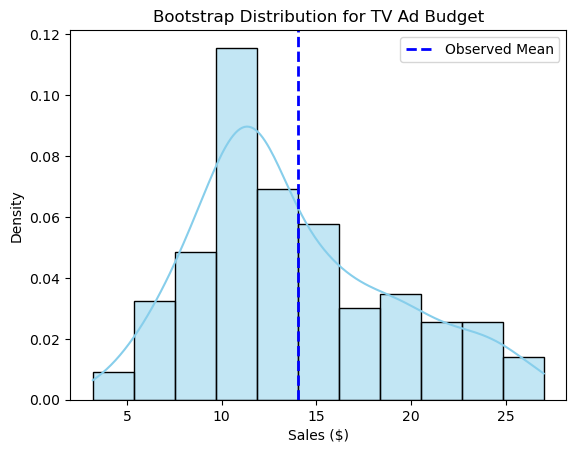

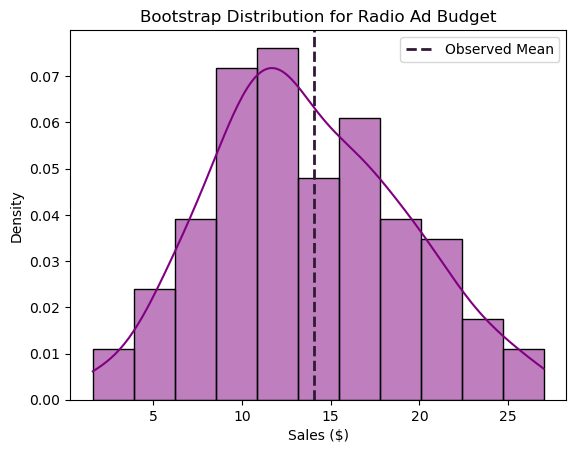

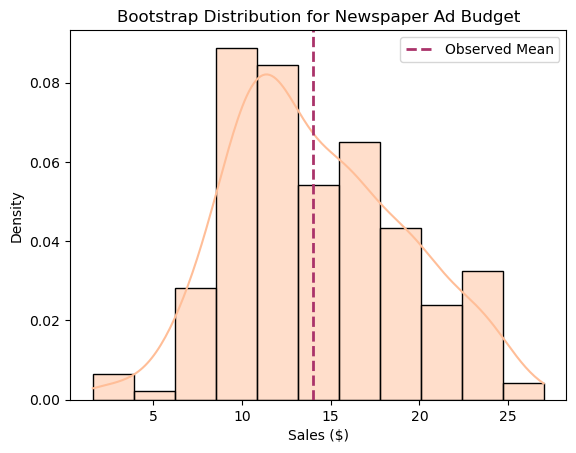

In [8]:
# Bootstrap for TV Ad Budget
tv_bootstrap = np.random.choice(tv_sales, size=len(tv_sales))
sns.histplot(tv_bootstrap, kde=True, stat='density', color='skyblue')
plt.axvline(np.mean(tv_sales), color='blue', linestyle='dashed', linewidth=2, label='Observed Mean')
plt.title('Bootstrap Distribution for TV Ad Budget')
plt.xlabel('Sales ($)')
plt.legend()
plt.show()

# Bootstrap for Radio Ad Budget
radio_bootstrap = np.random.choice(radio_sales, size=len(radio_sales))
sns.histplot(radio_bootstrap, kde=True, stat='density', color='purple')
plt.axvline(np.mean(radio_sales), color='#301934', linestyle='dashed', linewidth=2, label='Observed Mean')
plt.title('Bootstrap Distribution for Radio Ad Budget')
plt.xlabel('Sales ($)')
plt.legend()
plt.show()

# Bootstrap for Newspaper Ad Budget
newspaper_bootstrap = np.random.choice(newspaper_sales, size=len(newspaper_sales))
sns.histplot(newspaper_bootstrap, kde=True, stat='density', color='#FFBE98')
plt.axvline(np.mean(newspaper_sales), color='#AA336A', linestyle='dashed', linewidth=2, label='Observed Mean')
plt.title('Bootstrap Distribution for Newspaper Ad Budget')
plt.xlabel('Sales ($)')
plt.legend()
plt.show()

In [9]:
# Decision and Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in sales revenue among different advertising channels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sales revenue among different advertising channels.")

Fail to reject the null hypothesis. There is no significant difference in sales revenue among different advertising channels.


# Economic Growth and Unemployment Rate

*The dataset source is from kaggle of the author Mohamed Yosef.*

Link: https://www.kaggle.com/datasets/mohamedyosef101/economic-growth-and-unemployment-rate

#### Description: 

The utilized dataset is an assessment of the relationship between the economy's growth rate and the unemployment rate in the last four years since COVID-19. The observation is tested through **CHI-SQUARE**, which assesses the relationship between the two sectors.

In [10]:
eg_ur = pd.read_csv('ECONOMIC-GROWTH-AND-UNEMPLOYMENT-RATE.csv')

In [11]:
eg_ur

,Unnamed: 0,Date,GDP,Unemp
0,208,2019-01-01,21013.085,1.9
1,209,2019-04-01,21272.448,1.7
2,210,2019-07-01,21531.839,1.7
3,211,2019-10-01,21706.532,1.7
4,212,2020-01-01,21538.032,1.6
5,213,2020-04-01,19636.731,13.2
6,214,2020-07-01,21362.428,8.1
7,215,2020-10-01,21704.706,4.8
8,216,2021-01-01,22313.850,4.3
9,217,2021-04-01,23046.934,3.9


In [12]:
eg_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18 non-null     int64  
 1   Date        18 non-null     object 
 2   GDP         18 non-null     float64
 3   Unemp       18 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 708.0+ bytes


                      Date           GDP      Unemp
count                   18     18.000000  18.000000
mean   2021-02-14 12:00:00  23233.633000   3.233333
min    2019-01-01 00:00:00  19636.731000   1.500000
25%    2020-01-23 18:00:00  21533.387250   1.625000
50%    2021-02-15 00:00:00  22680.392000   1.800000
75%    2022-03-09 12:00:00  25121.477000   3.675000
max    2023-04-01 00:00:00  26798.605000  13.200000
std                    NaN   2201.913926   3.013304


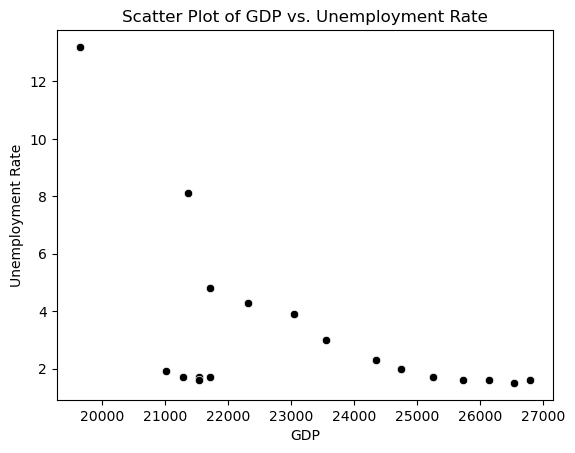

In [13]:
# Drop unnecessary columns
eg_ur.drop('Unnamed: 0', axis=1, inplace=True)

# Convert 'Date' column to datetime
eg_ur['Date'] = pd.to_datetime(eg_ur['Date'])

# Summary statistics
print(eg_ur.describe())

# Show the relationship between GDP and Unemployment
sns.scatterplot(x='GDP', y='Unemp', data=eg_ur, color='black')
plt.title('Scatter Plot of GDP vs. Unemployment Rate')
plt.xlabel('GDP')
plt.ylabel('Unemployment Rate')
plt.show()

### The null and alternative hypothesis are:

**Null hypothesis**: There is no significant association between GDP growth and Unemployment Rate.

**Alternative hypothesis**: There is a significant association between GDP growth and Unemployment Rate.

In [14]:
# Perform Chi-Squared
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(eg_ur['GDP'], eg_ur['Unemp'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print("\033[1mChi-Square Statistic:\033[0m", chi2)
print("\033[1mP-value:\033[0m", p)

Chi-Square Statistic: 198.0000000000001
P-value: 0.2768158646748164


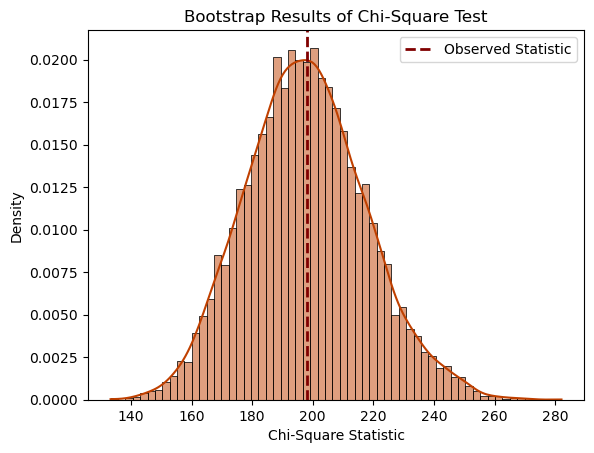

In [15]:
sns.histplot(np.random.chisquare(chi2, size=10000), kde=True, color='#C04000', stat='density')
plt.axvline(chi2, color='#800000', linestyle='dashed', linewidth=2, label='Observed Statistic')
plt.title('Bootstrap Results of Chi-Square Test')
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Density')
plt.legend()
plt.show()

In [16]:
# Decision and Conclusion
if p < 0.05:
    print("Reject the null hypothesis. There is a significant association between GDP and Unemployment Rate.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between GDP and Unemployment Rate.")

Fail to reject the null hypothesis. There is no significant association between GDP and Unemployment Rate.


---